In [8]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
N = 100 # number of weights
verbose = True
dev = 'cpu'

data = torch.randn(10000).to(dev)
#l = [min(data).item(), max(data).item()]
w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1).to(dev)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(-4, 4, N).to(dev)
l = torch.nn.parameter.Parameter(l)
# if l is min & max only
#index = [round((y.item() - l[0]) * (N - 1) / (l[1] - l[0])) for y in data]
# if l is all locations
index = torch.argmin(abs(l-data.view(-1,1)), dim=1)
def loss_fn(w):
    return -w[index].log().sum()


measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer(measure)
lr = 1e-4
for epoch in range(10000):
    measure.zero_gradient()
    loss = loss_fn(measure.weights)
    loss.backward()

    opt.step(lr)

    if epoch % 1000 == 0 and verbose:
        print(f'Epoch: {epoch:<10} Loss: {loss:<10.0f} LR: {lr}')


plt.hist(measure.sample(10000),bins=40, density=True, range=[-4,4])
plt.hist(torch.randn(10000),bins=40, density=True, range=[-4,4], alpha=0.5)
plt.legend(['Model','True data'])
plt.show()



Epoch: 0          Loss: 4605170    LR: 0.0001


KeyboardInterrupt: 

Epoch: 0          Loss: 12         LR: 0.001


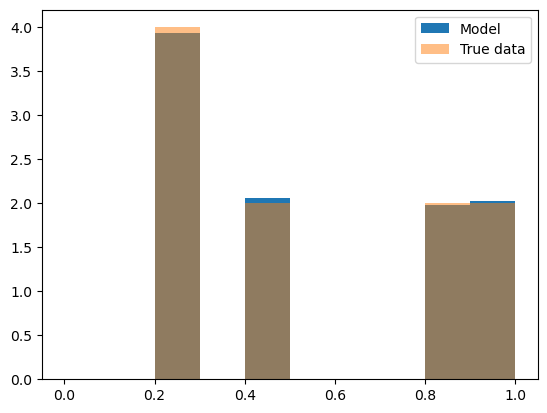

In [6]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
N = 11 # number of weights
verbose = True
data = torch.tensor([0.2,0.2,0.4,0.8,1])
#l = [min(data).item(), max(data).item()]
w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(0, 1, N)
l = torch.nn.parameter.Parameter(l)
# if l is min & max only
#index = [round((y.item() - l[0]) * (N - 1) / (l[1] - l[0])) for y in data]
# if l is all locations
index = torch.argmin(abs(l-data.view(-1,1)), dim=1)
def loss_fn(w):
    return -w[index].log().sum()


measure = pm.Measure(l, w)
opt = pm.Optimizer(measure)
lr = 1e-3
for epoch in range(1000):
    measure.zero_gradient()
    loss = loss_fn(measure.weights)
    loss.backward()

    opt.step(lr)

    if epoch % 1000 == 0 and verbose:
        print(f'Epoch: {epoch:<10} Loss: {loss:<10.0f} LR: {lr}')


plt.hist(measure.sample(10000),bins=10, density=True, range=[0,1])
plt.hist(data,bins=10, density=True, range=[0,1], alpha=0.5)
plt.legend(['Model','True data'])
plt.show()



In [28]:
print(measure)

Locations:     Weights: 
 0.0            0.0      
 0.10000000149011612      0.0      
 0.20000000298023224      0.4272727072238922
 0.30000001192092896      0.0      
 0.4000000059604645      0.19090908765792847
 0.5            0.0      
 0.6000000238418579      0.0      
 0.699999988079071      0.0      
 0.800000011920929      0.19090908765792847
 0.8999999761581421      0.0      
 1.0            0.19090908765792847

